## Trabalho Parcial de Classificação: Projeções Ortogonais da Disciplina de Algebra Linear

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import glob
from sklearn.model_selection import train_test_split as division
import cv2

### Redimensionando o tamanho das imagens de 400x400 para 40x40

In [3]:
images = glob.glob('*/*/*.png')

for file in images:
    img = Image.open(file)
    width, height = img.size
    (new_width, new_height) = (40, 40)
    img = img.resize(
        (round(new_width),
        round(new_height)),
        Image.ANTIALIAS)
    img.save(file, format='png')

### Convertendo as imagens de RGB para níveis de cinza (monocromáticas)

In [4]:
for file in images:
    img = Image.open(file).convert('L')
    img.save(file, format='png')

### Dividindo as imagens em treino e teste (80% treino e 20% teste) e compondo nossa matriz de dados de treino Md com os dados das imagens de treino

(1600, 32000)


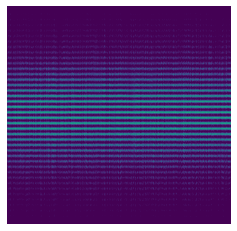

In [6]:
images_array = np.asarray(glob.glob('*/*/*.png'))
images_training, images_test = division(images_array, test_size=0.2, random_state=5)
md = Image.open(images_training[0])
md = np.asarray(md, dtype=np.float32)/255
md = np.reshape(md, (1600, 1))

for i in range(1, images_training.shape[0]):
        aux = Image.open(images_training[i])
        aux = np.asarray(aux, dtype=np.float32)/255
        aux = np.reshape(aux, (1600, 1))
        md = np.hstack((md, aux))

print(md.shape)
plt.figure(figsize=(4, 4))
im = plt.imshow(md, aspect='auto')
plt.axis("off")
plt.show()

### Centralizando os dados da nossa matriz de dados de treino md

In [17]:
md = md - np.mean(md)

In [24]:
cov = np.cov(md, rowvar=0)
print(cov.size)
print(md.size)

2560000
51200000
